In [7]:
cd \Users\Gomu\Downloads

C:\Users\Gomu\Downloads


In [8]:
pwd

'C:\\Users\\Gomu\\Downloads'

In [9]:
df = pd.read_csv("AXISBANK.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


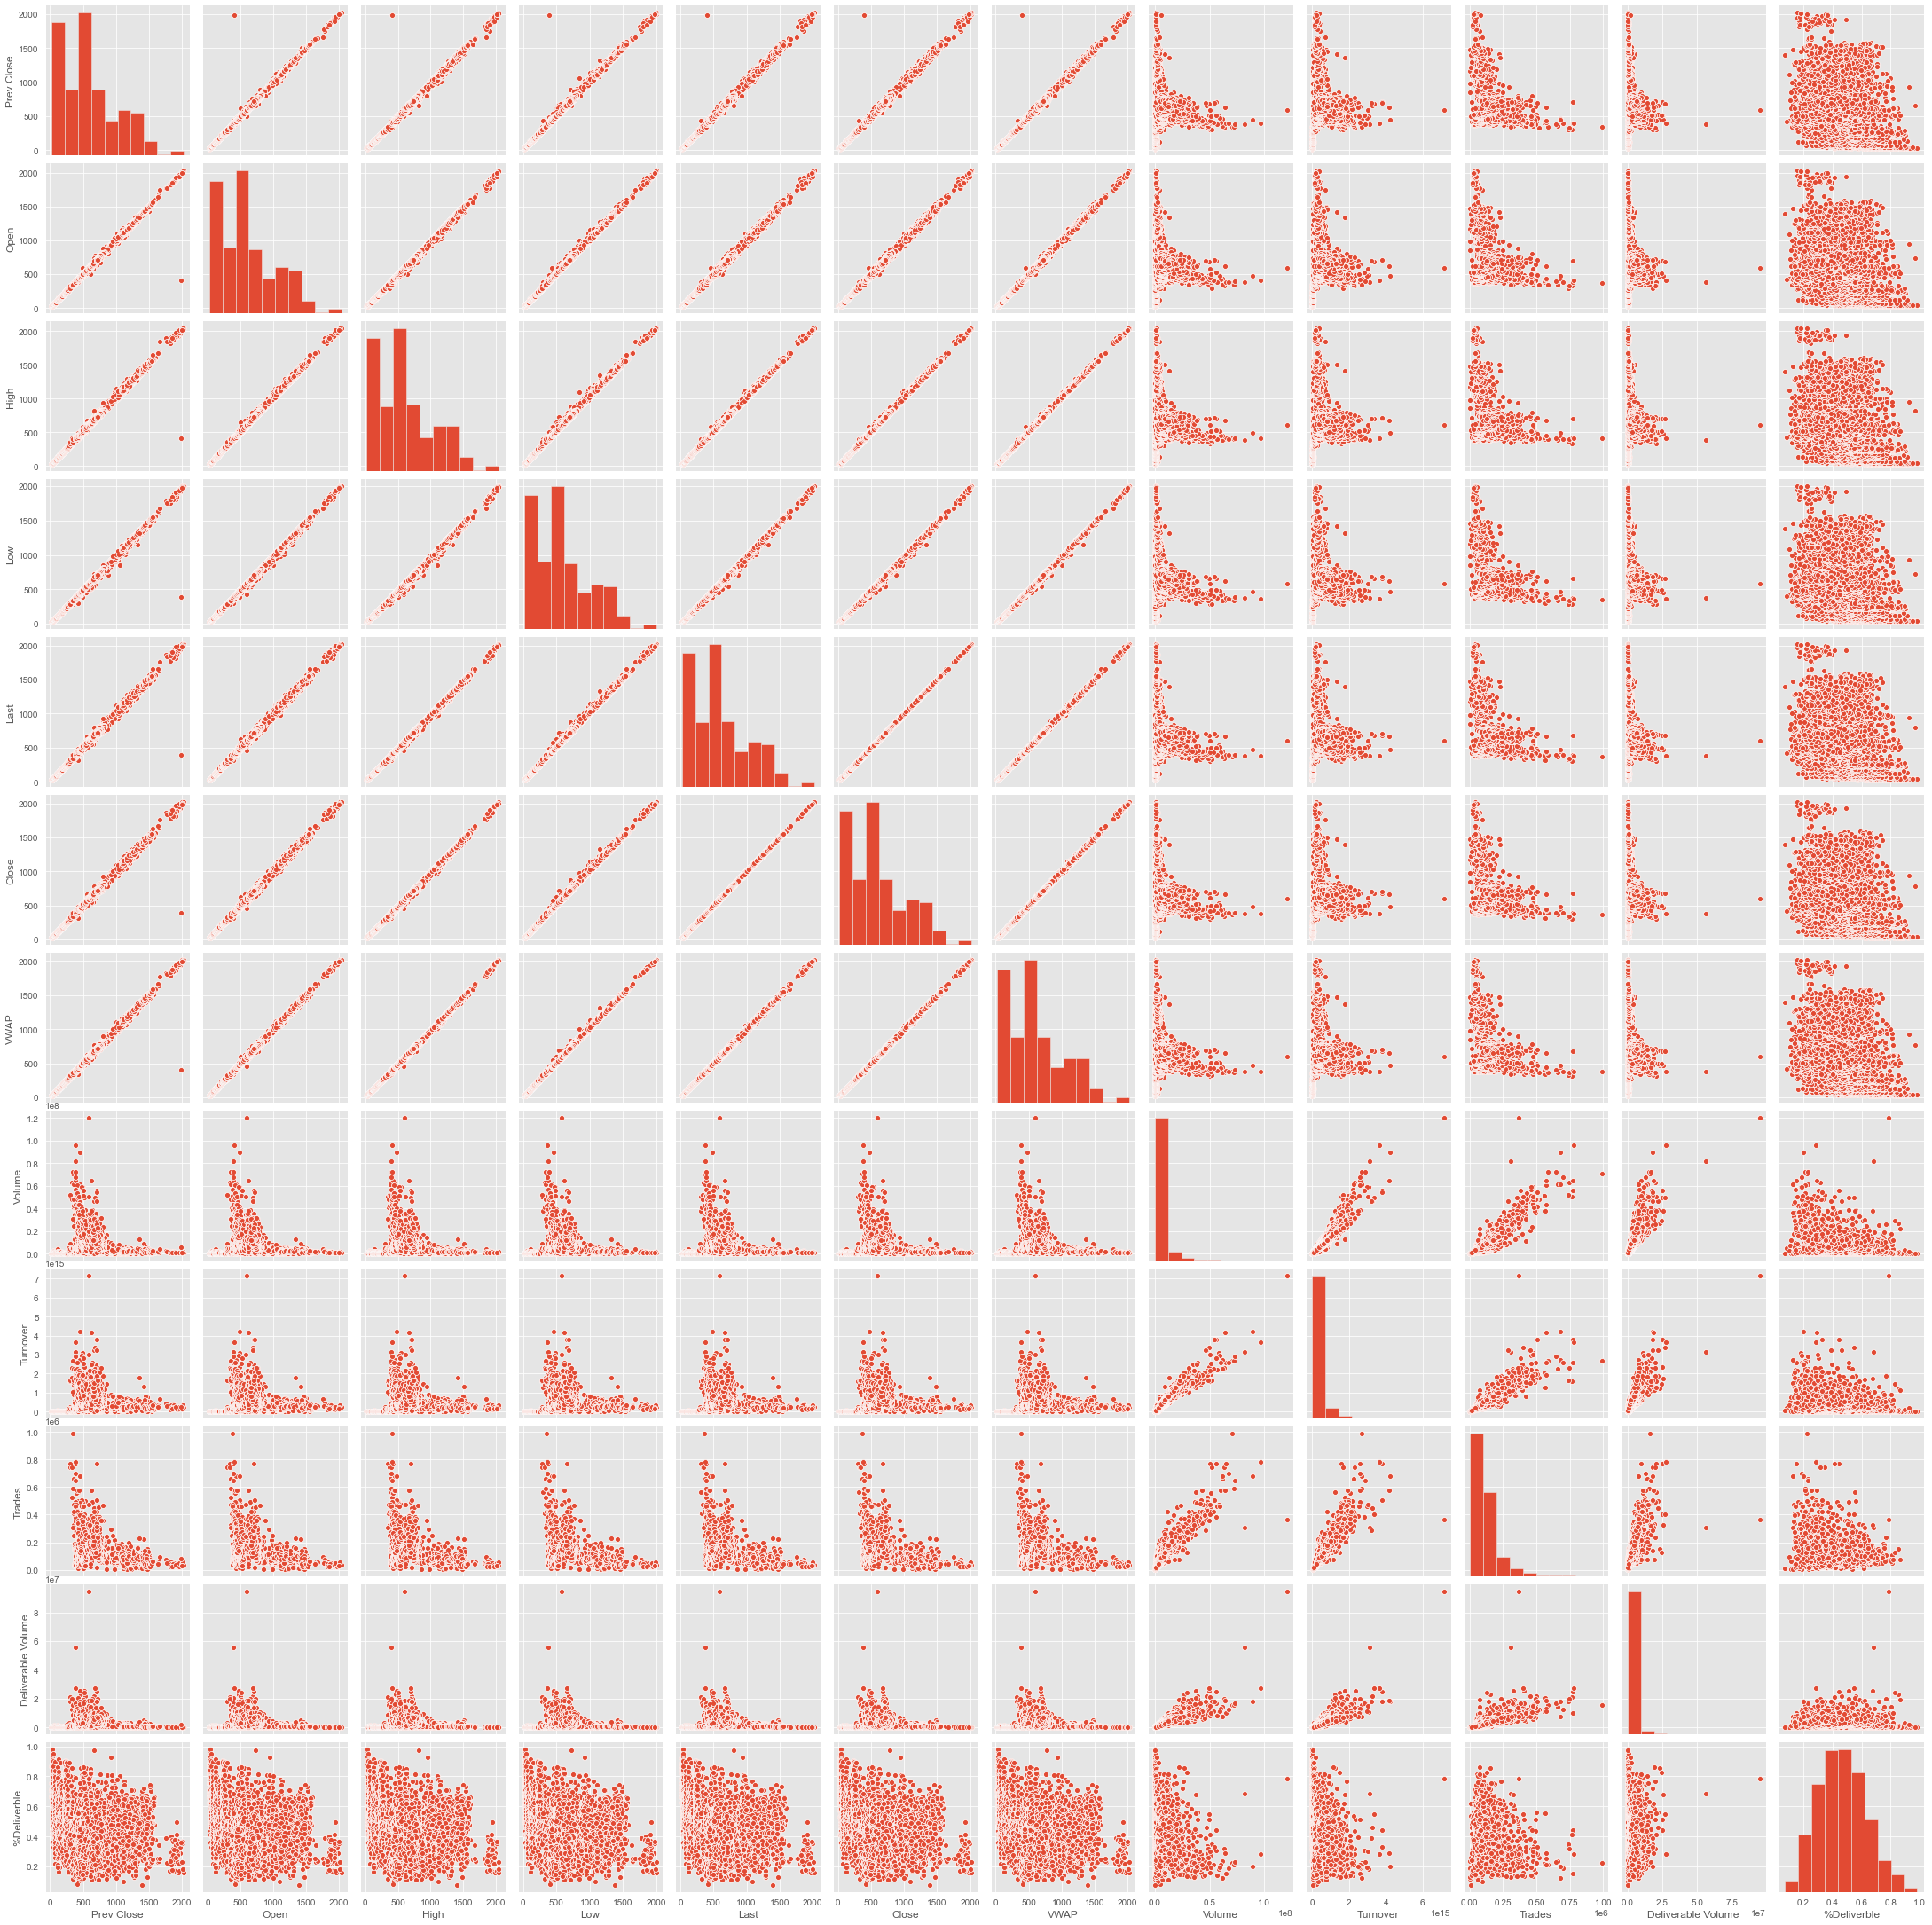

In [11]:
import seaborn as sb
sb.pairplot(df)

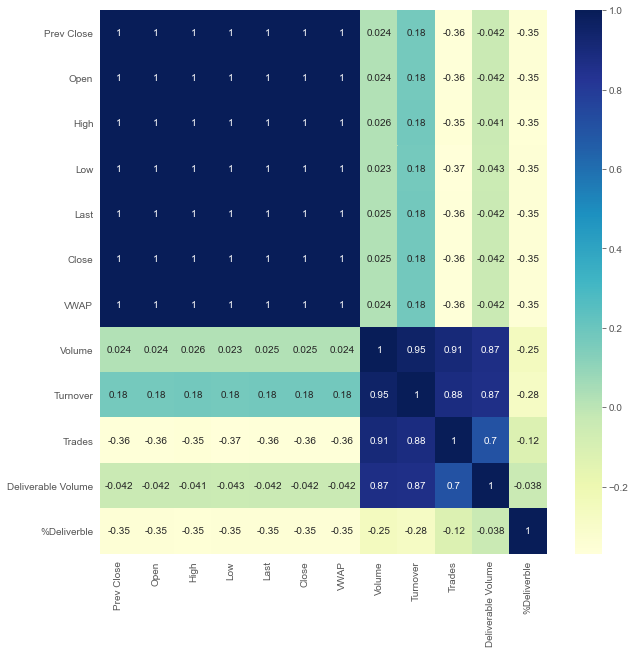

In [12]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [13]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

In [14]:
df.set_index("Date", drop=False, inplace=True)

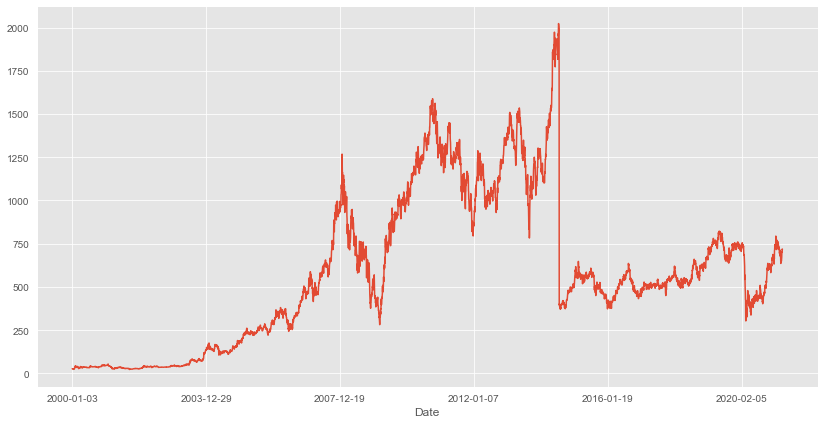

In [15]:
df.Close.plot(figsize=(14, 7))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Volume  5306 non-null   int64  
 5   VWAP    5306 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 248.8+ KB


In [17]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low","VWAP"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [18]:
df.fillna(df.mean(), inplace=True)

In [19]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,120602.231678,1.990907e+06,0.466962,586.356873,16.064095,596.319031,14.912312,575.418579,15.362468,585.924377,14.718283
2000-01-04,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,120602.231678,1.990907e+06,0.466962,26.700001,16.064095,26.700001,14.912312,26.700001,15.362468,26.700001,14.718283
2000-01-05,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,120602.231678,1.990907e+06,0.466962,26.850000,0.212132,27.700001,1.414214,26.600000,0.141421,26.969999,0.381838
2000-01-06,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,120602.231678,1.990907e+06,0.466962,26.566668,0.513160,27.716667,1.000417,26.233334,0.642910,26.726667,0.500533
2000-01-07,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,120602.231678,1.990907e+06,0.466962,26.266666,0.567891,27.816668,0.891978,25.933332,0.567891,26.583334,0.468143


In [20]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,120602.231678,1.990907e+06,0.466962,586.356873,16.064095,596.319031,14.912312,575.418579,15.362468,585.924377,14.718283,1,3,0
2000-01-04,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,120602.231678,1.990907e+06,0.466962,26.700001,16.064095,26.700001,14.912312,26.700001,15.362468,26.700001,14.718283,1,4,1
2000-01-05,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,120602.231678,1.990907e+06,0.466962,26.850000,0.212132,27.700001,1.414214,26.600000,0.141421,26.969999,0.381838,1,5,2
2000-01-06,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,120602.231678,1.990907e+06,0.466962,26.566668,0.513160,27.716667,1.000417,26.233334,0.642910,26.726667,0.500533,1,6,3
2000-01-07,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,120602.231678,1.990907e+06,0.466962,26.266666,0.567891,27.816668,0.891978,25.933332,0.567891,26.583334,0.468143,1,7,4


In [21]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

In [22]:
df_train = df[df.Date < "2018"]
df_test = df[df.Date >= "2018"]

In [23]:
df_test.shape

(823, 24)

In [26]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Prev Close,24.7,26.7,26.85,26.3,25.95
Open,26.7,27,26,25.8,25
High,26.7,28.7,27.75,27,26
Low,26.7,26.5,25.5,25.8,24.25
Last,26.7,27,26.4,25.9,25
Close,26.7,26.85,26.3,25.95,24.8
VWAP,26.7,27.24,26.24,26.27,25.04
Volume,112100,234500,170100,102100,62600
Turnover,2.99307e+11,6.38728e+11,4.46298e+11,2.68173e+11,1.56722e+11


In [28]:
from sklearn.preprocessing import MinMaxScaler
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [46]:
y_test = df_test["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_test1=scaler1.fit_transform(np.array(df_test['Close']).reshape(-1,1))
y_testn = df_test["Close"].to_numpy().reshape(-1,1)

In [47]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

In [48]:
X_test = df_test.drop(columns=["Close"])
X_test1 = X_test.drop("Date", axis=1)
X_test1 = (X_test1-X_test1.min())/(X_test1.max()-X_test1.min())
X_test2 = pd.concat((X_test1, X_test.Date), 1)

In [49]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_test3 = X_test2.drop(columns=['Date']).to_numpy()
y_train1 = y_train1.reshape(-1,1)
y_test1 = y_test1.reshape(-1,1)

In [52]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [66]:
xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_test3,y_test1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.31982	validation_1-rmse:0.24543
[1]	validation_0-rmse:0.31663	validation_1-rmse:0.24281
[2]	validation_0-rmse:0.31348	validation_1-rmse:0.24022
[3]	validation_0-rmse:0.31036	validation_1-rmse:0.23765
[4]	validation_0-rmse:0.30727	validation_1-rmse:0.23511
[5]	validation_0-rmse:0.30421	validation_1-rmse:0.23259
[6]	validation_0-rmse:0.30118	validation_1-rmse:0.23010
[7]	validation_0-rmse:0.29818	validation_1-rmse:0.22764
[8]	validation_0-rmse:0.29521	validation_1-rmse:0.22525
[9]	validation_0-rmse:0.29227	validation_1-rmse:0.22287
[10]	validation_0-rmse:0.28936	validation_1-rmse:0.22052
[11]	validation_0-rmse:0.28648	validation_1-rmse:0.21821
[12]	validation_0-rmse:0.28363	validation_1-rmse:0.21590
[13]	validation_0-rmse:0.28080	validation_1-rmse:0.21363
[14]	validation_0-rmse:0.27801	validation_1-rmse:0.21138
[15]	validation_0-rmse:0.27524	validation_1-rmse:0.20915
[16]	validation_0-rmse:0.27250	validation_1-rmse:0.20694
[17]	validation_0-rmse:0.26979	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_test3,y_test1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.31982	validation_1-rmse:0.24543
[1]	validation_0-rmse:0.31663	validation_1-rmse:0.24281
[2]	validation_0-rmse:0.31348	validation_1-rmse:0.24022
[3]	validation_0-rmse:0.31036	validation_1-rmse:0.23765
[4]	validation_0-rmse:0.30727	validation_1-rmse:0.23511
[5]	validation_0-rmse:0.30421	validation_1-rmse:0.23259
[6]	validation_0-rmse:0.30118	validation_1-rmse:0.23010
[7]	validation_0-rmse:0.29818	validation_1-rmse:0.22764
[8]	validation_0-rmse:0.29521	validation_1-rmse:0.22525
[9]	validation_0-rmse:0.29227	validation_1-rmse:0.22287
[10]	validation_0-rmse:0.28936	validation_1-rmse:0.22052
[11]	validation_0-rmse:0.28648	validation_1-rmse:0.21821
[12]	validation_0-rmse:0.28363	validation_1-rmse:0.21590
[13]	validation_0-rmse:0.28080	validation_1-rmse:0.21363
[14]	validation_0-rmse:0.27801	validation_1-rmse:0.21138
[15]	validation_0-rmse:0.27524	validation_1-rmse:0.20915
[16]	validation_0-rmse:0.27250	validation_1-rmse:0.20694
[17]	validation_0-rmse:0.26979	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<Figure size 864x576 with 0 Axes>

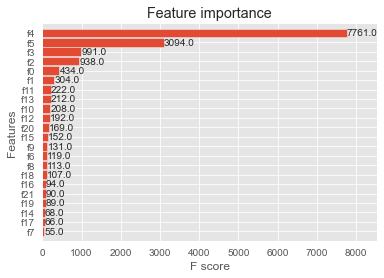

In [68]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [69]:
predicted_results_v = xgb.predict(X_test3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

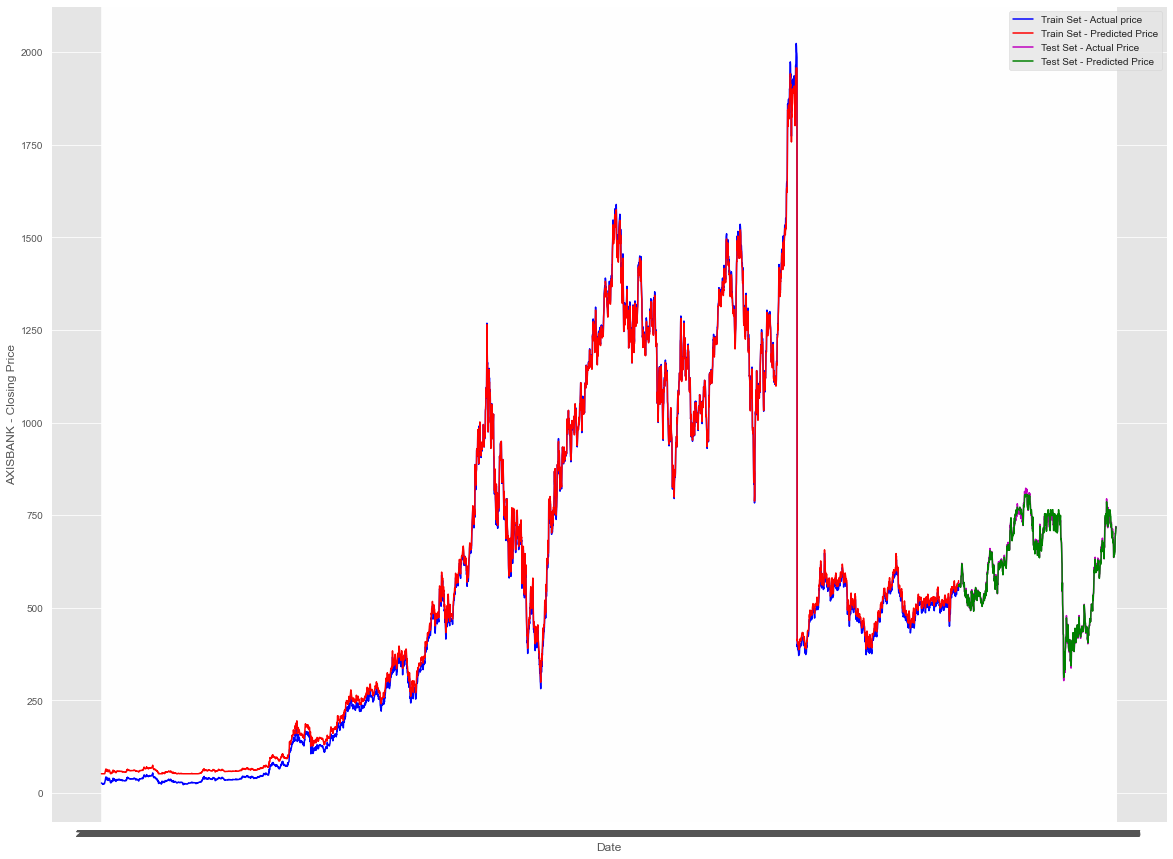

In [70]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="Train Set - Actual price",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="Train Set - Predicted Price",color='r')
plt.plot(X_test2.index,list(y_testn),label="Test Set - Actual Price",color='m')
plt.plot(X_test2.index,list(predicted_results_v),label="Test Set - Predicted Price",color='g')

plt.xlabel('Date')
plt.ylabel('AXISBANK - Closing Price')
plt.legend()
plt.show()